<a href="https://colab.research.google.com/github/Anushka118/MTech/blob/aci/Optimal_Route_Planner_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial and Computational Intelligence Assignment 1

A professional photographer needs to travel from his home city to a remote location for an important photo shoot. Due to unexpected delays, he has a limited amount of time to reach the destination. The photographer is relying on a travel agent that provides navigation assistance. The cities along the route are connected by various roads, and the travel agent must help him choose the best route. The goal is for the photographer to reach the destination in the minimum time possible. The agent will assist by calculating the most efficient route. The road network is depicted in a diagram with travel times (costs) between the cities (nodes).  The program should be able to take-in start and goal nodes dynamically from the user at run time. For the heuristic design, we will consider all possible paths between the start city and the destination, using the average travel time across all paths as the heuristic value h(n).
Use the following algorithms to determine the minimum travel time and ensure the photographer reaches his destination on time:

1. Recursive Best First Search
2. Genetic Algorithm

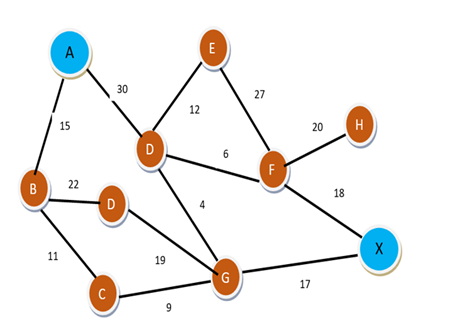

List all the team members BITS ID ,Name along with % of contribution in this assignment: sample Provided below:
1. 2024ab05067@wilp.bits-pilani.ac.in Anushka Sharma 100%
2. 2024ab05069@wilp.bits-pilani.ac.in Ayush Kumar 100%

## Problem solving by Uninformed & Informed Search

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block<BR>


PEAS (Performance Measure, Environment, Actuators, Sensors)

The PEAS framework is a way to design an intelligent agent by breaking down its components into four categories: Performance Measure, Environment, Actuators, and Sensors. Each of these categories helps to define the role and behavior of the agent in the task environment.
For the travel agent assisting the photographer in choosing the optimal route, the PEAS components can be defined as follows:

1. Performance Measure (P)
The Performance Measure defines the criteria by which the agent's performance will be judged. For the photographer’s journey, the performance measure could be based on factors like:
Total Travel Time: The agent should aim to minimize the travel time between the start city and the goal city. This would be the primary performance measure.
Arrival Time: If there's a time deadline (e.g., for the photo shoot), the agent should ensure that the photographer arrives on time.
Safety/Comfort: Additional considerations, such as avoiding dangerous routes or ensuring that the travel time is comfortable (if any such data is available), could also influence the performance measure.
So, the goal of the agent is to minimize the total travel time and ensure the photographer arrives at the destination on time, following the most efficient route.

2. Environment (E)

The Environment is the external context in which the agent operates. In this case, the environment involves:
The Road Network: A map of cities (nodes) connected by roads (edges), where each road has an associated travel time (cost). The road network may vary based on factors like road quality, traffic, and road conditions.
Start and Goal Cities: The starting city where the photographer begins their journey and the destination city they need to reach.
External Factors: Traffic conditions, road closures, weather, or other real-time factors that can affect travel times could be part of the environment. These factors may change dynamically.
In this case, the environment is a graph of cities, where the photographer needs to find the most efficient path.

3. Actuators (A)
Actuators are the mechanisms by which the agent interacts with the environment. In this case, the actuators would be:
Displaying the Optimal Route: The agent outputs the best route (path) for the photographer, which could be displayed via a map or navigation system.
Providing Directions: The agent could issue turn-by-turn navigation instructions to the photographer (if integrated with a GPS system).
Updating the Route: In case of changing conditions (e.g., new traffic information or road closures), the agent may suggest a new route.
So, the agent’s actuators primarily involve communication and guidance of the photographer to the destination.

4. Sensors (S)
Sensors are the mechanisms by which the agent perceives its environment. In this case, the sensors could include:
GPS Data: The agent may use GPS data to track the photographer’s current location in real-time.
Traffic Information: The agent might receive real-time traffic data (e.g., road closures, accidents, or delays).
Weather Reports: The agent might have access to weather data to suggest better routes if adverse weather conditions are expected.
Map of the Road Network: The agent might access an up-to-date map or database of cities and roads, including travel times between cities.
These sensors would help the agent gather real-time information and provide dynamic, adaptive routing suggestions to the photographer.

Task Environment of the Agent
The Task Environment defines the external factors that affect the agent’s operation and decisions. It describes the problem the agent is trying to solve and the conditions under which it operates.
For the photographer’s navigation problem, the task environment includes the following:
Dynamic: The travel time between cities might change over time due to traffic, road closures, or weather conditions. Thus, the environment is dynamic, and the agent must adapt its suggestions accordingly.
Partially Observable: The agent might not have complete information about the current state of the environment (e.g., real-time traffic conditions or changes in road availability). This is a partially observable environment.
Discrete: The environment could be considered discrete because the cities are distinct locations, and the roads are specific paths between them. The photographer moves from one city (node) to another along discrete roads (edges).
Deterministic (mostly): In the absence of real-time factors like traffic or road closures, the environment could be deterministic, meaning the time to travel between two cities is fixed. However, in real-world scenarios, the agent needs to account for uncertainty in travel times due to traffic and other factors.



Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [ ]:
#Code Block : Set Initial State (Must handle dynamic inputs)

#DEFINING THE GRAPH GIVEN IN THE PROBLEM STATEMENT USING 'DICTIONARY'
graph = {
    'A':[('B',15), ('D1',30)],
    'B':[('A',15), ('D2',22), ('C',11)],
    'C':[('B',11), ('G',9)],
    'D1':[('A',30), ('E',12), ('F',6), ('G',4)],
    'E':[('D1',12), ('F',27)],
    'F':[('D1',6), ('E',27),('H',20),('X',18)],
    'G':[('C',9), ('D2', 19), ('D1',4), ('X', 17)],
    'H':[('F',20)],
    'D2':[('B',22),('G',19)],
    'X':[('G', 17),('F',18)]
  }


In [ ]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

def find_all_paths(graph, start, end, path=[], path_cost = 0): #returns all the paths between the start and the end node.
  # print("Start:", start, "\tEnd:",end, "\tPath:", path)
  path = path + [start]
  if start == end:
    return [(path, path_cost)]

  paths = []


  for neighbor in graph[start]:
    if neighbor[0] not in path:
      new_paths = find_all_paths(graph, neighbor[0], end, path, path_cost + neighbor[1])
      for new_path, new_path_cost in new_paths:
        paths.append((new_path, new_path_cost))

  return paths

#Heuristic function: Average path cost, i.e. total cost across all paths from start node to goal node / total paths
def heuristic(node, goal, graph):
  if node == goal:
    return 0

  all_paths = find_all_paths(graph, node, goal)
  # print(all_paths)
  total_cost = 0
  for path in all_paths:
    total_cost +=path[1]

  if len(all_paths) > 0:
    return total_cost / len(all_paths)

  else:
    return float('inf') # no path found

#STORING HEURISTIC VALUES FOR ALL NODES IN A DICTIONARY

def store_heuristic_values(graph, goal, Nodes):
  hn = {}
  for n in Nodes:
    hn[n] = round(heuristic(n, goal, graph),2)
  return hn

#DEFINING A CLASS 'NODE' - WILL BE USED IN RECURSIVE BEST FIRST SEARCH.
class Node:
  def __init__(self, state, parent = None, g = 0, h = 0):
    self.state = state
    self.parent = parent
    self.g = g # cost to reach this node
    self.h = h #heuristic estimate to the goal from this node
    self.f = g + h #evaluation function

  def path(self):
    path = []
    current=self
    while current:
      path.insert(0,current.state)
      current = current.parent
    return path

# FITNESS FUNCTION FOR GENETIC ALGORITHM
def calculate_fitness(individual, graph, start, end):
  if individual is None:
    return float('inf')

  path_cost = 0
  for i in range(len(individual)-1):
    current_node = individual[i]
    next_node = individual[i+1]
    edge_cost = next((cost for neighbor, cost in graph[current_node] if neighbor == next_node), None)
    if edge_cost is None:
      return float('inf')

    path_cost += edge_cost

  heuristic_cost = heuristic(individual[-1], end, graph)
  return path_cost + heuristic_cost




In [ ]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented

def rbfs_recursive(node, goal, f_limit):
  #GOAL TEST
  if node.state == goal.state:
    print(f"GOAL TEST PASSED!\n{node.path(), node.f}")
    return node.path(), node.f

  #IF THE GOAL TEST FAILS EXPAND THE NODE.
  print(f"Goal Test Failed. Expanding {node.state}")
  successors = [(neighbor, cost) for neighbor, cost in graph[node.state]]

  if not successors:
    return None, float('inf')

  children = []
  for neighbor, cost in successors:
    child = Node(neighbor, node, node.g+cost, heuristic(neighbor, goal, graph))
    child.f = min(child.g+child.h, node.f)
    children.append(child)

  # for child in children:
  #   print(child.state, child.parent, child.g, child.h, child.f)


  while True:
    successors.sort(key = lambda x: x[1])
    best= successors[0][0]
    print(best)
    if best.f > f_limit:
      return None, best.f

    if best.state == goal:
      return best.path(), best.f

    alternative = successors[1][1].f if len(successors) > 1 else float('inf')
    result, best.f = rbfs_recursive(best, goal, min(f_limit, alternative))

    if result is not None:
      return result, best.f


In [ ]:
# FOR GENETIC ALGORITHM
import random
def create_individual(graph, start, end):
  path = [start]
  current_node = start

  while current_node != end:
    neighbors = [neighbor for neighbor, cost in graph[current_node] if neighbor not in path]
    if not neighbors:
      return None
    next_node = random.choice(neighbors)
    path.append(next_node)
    current_node = next_node
  return path

def is_valid_path(path, graph):
  if path is None:
    return False

  all_paths = find_all_paths(graph, path[0], path[-1])
  if not all_paths:
    return False

  for p,c in all_paths:
    if p == path:
      return True

  return False

#SELECTION BASED ON TOURNAMENT WINNER.
def selection(population, graph, start, end, tournament_size=5):
  winners = []
  for _ in range(len(population)):
    tournament = random.sample(population, tournament_size)
    winner = min(tournament, key=lambda ind: calculate_fitness(ind, graph, start, end))
    winners.append(winner)
  return winners

def crossover(parent1, parent2):
  if parent1 is None or parent2 is None or len(parent1) < 2 or len(parent2) <2:
    return parent1, parent2

  size = min(len(parent1), len(parent2))
  if size < 2:
    return parent2, parent1

  crossover_point = random.randint(1, size-2)

  print(f"\tCrossover point = {crossover_point} |\t Parent1: {parent1}, Parent2: {parent2}")

  child1 = parent1[:crossover_point]

  for node in parent2:
      if node not in child1:
          child1.append(node)
  print(f"\tCrossover point = {crossover_point} |\t Parent1: {parent1}, Parent2: {parent2}")

  child2 = parent2[:crossover_point]
  for node in parent1:
      if node not in child2:
          child2.append(node)

  return child1, child2


def mutation(individual, graph, start, end):
  if individual is None or len(individual)<=2:
    return individual

  index1 = random.randint(1, len(individual)-2)
  index2 = random.randint(1, len(individual)-2)
  individual[index1], individual[index2] = individual[index2], individual[index1]
  return individual


### 2.	Definition of Algorithm 1 (RECURSIVE BEST FIRST SEARCH)

In [ ]:
#Code Block : Function for algorithm 1 implementation
#ALGORITHM 1: RECURSIVE BEST FIRST SEARCH
def rbfs(node, goal, f_limit):
  print("Current Node:", node.state, "\tf_limit:",f_limit)
  successors = graph[node.state]

  #GOAL TEST
  if node.state == goal.state:
    return [goal.state], 0

  if not successors:
    return None, float('inf')

  children = []
  for child, wt in successors:
    curr = Node(child, node, wt+node.g, hn[child])
    curr.f = max(curr.g+curr.h, node.f)
    children.append(curr)
    print("\t\t",curr.state, curr.g, curr.h, curr.f)

  while True:
    children.sort(key = lambda x: x.f)
    best_child = children[0]
    print("Best_child:",best_child.state)
    if best_child.f > f_limit:
      return None, best_child.f

    if best_child.state == goal.state:
      return best_child.path(), best_child.f

    alternative = children[1].f if len(successors) > 1 else float('inf')
    result, best_child.f = rbfs(best_child, goal, min(f_limit, alternative))

    if result is not None:

      return result, best_child.f


### 3.	Definition of Algorithm 2 (Genetic Algorithm)

In [ ]:
#Code Block : Function for algorithm 2 implementation
#ALGORITHM: GENETIC ALGORITHM
def genetic_algo_pathfinding(graph, start_node, end_node, population_size=20, generations=10, mutation_rate = 0.05):
  # print(start_node.state, end_node.state)
  population = []
  while len(population) < population_size:
    individual = create_individual(graph, start_node.state, end_node.state)
    if is_valid_path(individual, graph):
      population.append(individual)

  if not population:
    print("No valid paths could be generated to start")
    return None
  print('PRINTING THE POPULATION:')
  print(population)


  for generation in range(generations):
    parents = selection(population, graph, start_node.state, end_node.state)
    print(f"Parents in Generation {generation}: ")
    print(parents)
    offspring = []
    for i in range(0, len(parents)-1, 2):
      print(f"Crossover betweem {parents[i]} & {parents[i+1]}.")
      child1, child2 = crossover(parents[i], parents[i+1])
      if child1: offspring.append(child1)
      if child2: offspring.append(child2)
      print(f"child1 = {child1} | child2 = {child2}")
      print()

    print()
    offspring = [mutation(individual, graph, start_node.state, end_node.state) for individual in offspring]
    print("Offspring:")
    print(offspring)


    population = offspring[:population_size]
    population = [p for p in population if p is not None]
    print("New Population: ")
    print(population)

    best_individual = min(population, key=lambda ind: calculate_fitness(ind, graph, start_node.state, end_node.state))
    best_fitness = calculate_fitness(best_individual, graph, start_node.state, end_node.state)
    print()
    print(f"Best Individual (so far): {best_individual} \t Best Fitness Score (so far): {best_fitness}")

    print('-'*100)
    if generation %20 ==0:
      print(f"Generation {generation+1}, Best Fitness Score (so far): {best_fitness}, Best Path (so far): {best_individual}")

    if best_fitness == float('inf') and all(calculate_fitness(p, graph, start_node.state, end_node.state) == float('inf') for p in population):
      print("All paths are invalid")
      return None

  best_individual = min(population, key=lambda ind: calculate_fitness(ind, graph, start_node.state, end_node.state))
  best_fitness = calculate_fitness(best_individual, graph, start_node.state, end_node.state)
  print()
  print()
  print('-'*100)
  print(f"Best Individual: {best_individual} \t Best Fitness: {best_fitness}")

  return best_individual, best_fitness

### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [ ]:
#Code Block : Function & call to get inputs (start/end state)

#TAKING INPUT FROM THE USER FOR THE START NODE AND CHECKING IT'S VALIDITY
start_node = input('Enter the start node:')
goal_node = input('Enter the goal node:')
if start_node not in ('A','B','C','D1','D2','E','F','G','H','X') or goal_node not in ('A','B','C','D1','D2','E','F','G','H','X'):
  print('Invalid Start/Goal Node')

else:
  Nodes = ['A','B','C','D1','D2','E','F','G','H','X']
  hn = store_heuristic_values(graph, goal_node, Nodes)
  start = Node(start_node, None, 0, hn[start_node]) # Initializing an instance of the start node
  goal = Node(goal_node, None, 0, hn[goal_node]) # Initializing an instance of the goal node

Enter the start node:A
Enter the goal node:F


### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [ ]:
import time
import psutil

In [ ]:
time_take_rbfs = 0
memory_used_rbfs = 0

In [ ]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))
#INVOKING RECURSIVE BFS
start_time = time.time()
process = psutil.Process()

solution, fn = rbfs(start, goal, float('inf'))

print('-'*100)
print()
if solution:
  print("Solution found.")
  print("THE PHOTOGRAPHER SHOULD TAKE THE FOLLOWING PATH:", solution)
  print(f"TIME TAKEN TO TRAVEL THE PATH: {fn}")
else:
  print("No solution found")

end_time = time.time()
memory_used_rbfs = process.memory_info().rss / (1024 * 1024)
time_take_rbfs = end_time - start_time
print('-'*100)




Current Node: A 	f_limit: inf
		 B 15 64.22 79.22
		 D1 30 61.0 91.0
Best_child: B
Current Node: B 	f_limit: 91.0
		 A 30 69.22 99.22
		 D2 37 77.91 114.91
		 C 26 76.91 102.91
Best_child: A
Best_child: D1
Current Node: D1 	f_limit: 99.22
		 A 60 69.22 129.22
		 E 42 68.2 110.2
		 F 36 0 91.0
		 G 34 68.57 102.57
Best_child: F
----------------------------------------------------------------------------------------------------

Solution found.
THE PHOTOGRAPHER SHOULD TAKE THE FOLLOWING PATH: ['A', 'D1', 'F']
TIME TAKEN TO TRAVEL THE PATH: 91.0
----------------------------------------------------------------------------------------------------


In [ ]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))
start_time = time.time()
process = psutil.Process()


solution, score = genetic_algo_pathfinding(graph, start, goal)

if solution:
  print("Solution found.")
  # print("Evaluation Function value:", fn)
  print("THE PHOTOGRAPHER SHOULD TAKE THE FOLLOWING PATH:", solution)
  print(f"TIME TAKEN TO TRAVEL THE PATH: {score}")
else:
  print("No solution found")

print()
print('-'*100)

end_time = time.time()
memory_used_genetic_algo = process.memory_info().rss / (1024 * 1024)
time_take_genetic_algo = end_time - start_time

PRINTING THE POPULATION:
[['A', 'B', 'D2', 'G', 'D1', 'F'], ['A', 'D1', 'G', 'X', 'F'], ['A', 'D1', 'E', 'F'], ['A', 'D1', 'F'], ['A', 'B', 'C', 'G', 'X', 'F'], ['A', 'D1', 'G', 'X', 'F'], ['A', 'B', 'D2', 'G', 'D1', 'E', 'F'], ['A', 'D1', 'E', 'F'], ['A', 'B', 'C', 'G', 'D1', 'E', 'F'], ['A', 'B', 'C', 'G', 'D1', 'E', 'F'], ['A', 'D1', 'E', 'F'], ['A', 'D1', 'F'], ['A', 'B', 'C', 'G', 'X', 'F'], ['A', 'B', 'C', 'G', 'D1', 'E', 'F'], ['A', 'D1', 'E', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'E', 'F'], ['A', 'B', 'C', 'G', 'X', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'G', 'X', 'F']]
Parents in Generation 0: 
[['A', 'D1', 'E', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'G', 'X', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'F'], ['A', 'D1', 'E', 'F']]
Crossover bet

### 5.	Comparitive Analysis (Time and Space Complexity)

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 1
# print(memory_used_rbfs, time_take_rbfs)
print(f"Time taken: {time_take_rbfs:.4f} seconds")
print(f"Memory used: {memory_used_rbfs:.2f} MB")

Time taken: 0.0267 seconds
Memory used: 306.57 MB


In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 2
# print(memory_used_genetic_algo, time_take_genetic_algo)
print(f"Time taken: {time_take_genetic_algo:.4f} seconds")
print(f"Memory used: {memory_used_genetic_algo:.2f} MB")

Time taken: 0.0421 seconds
Memory used: 306.57 MB


### **RECURSIVE BEST BEST SEARCH** <br>
TIME COMPLEXITY: O(b^d) <br>
SPACE COMPLEXITY: O(bd) <br>

where,<br>
b: branching factor,<br>
d: max depth<br>

### **GENETIC ALGORITHM** <br>
TIME COMPLEXITY: O(n * g * m) <br>
SPACE COMPLEXITY: O(n*m) <br>

where<br>
n: no. of individuals, <br>
g: no. of generations,<br>
m: no. of nodes



### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : <br>
* RBFS is an informed search that recursively expands the most relevant node, whereas Genetic Algorithm is an evolutionary algorithm which evolves based on the population.
*Memory usage is Linear for RBFS, but for Genetic algorithm, the memory usage depends on the population size.
* Genetic Algorithm can be computationally more expensive compared to RBFS

________________________________________________________

_________________________________________________________